# Week6 Bag of words 词袋模型

### 1.中文词袋模型与词云图
### 2.英文词袋模型与词云图
### 3.个人作业词袋模型与词云图

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。简单来说，词袋模型可以帮助大家计算词频。

# 1.中文词袋模型与词云图

## 1.1数据预处理

In [1]:
import pandas as pd

In [13]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 360.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
#导入数据
import pandas as pd #数据表
text_ana = pd.read_csv('/Users/jiaojiao/Downloads/text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'],axis=1)
text_ana

标题/微博内容  点赞  转发  评论  \
0                 #高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​   0   0   0   
1                                                    转发C   0   0   0   
2      【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...   0   0   0   
3      丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...   0   0   0   
4                            诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！   0   0   0   
...                                                  ...  ..  ..  ..   
49995  935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布    ...   0   0   0   
49996        4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​   0   0   0   
49997                                                转发C   0   0   1   
49998      全体     甘肃车主注意       4月1日起，全面实施！           ...   0   0   0   
49999  【南通司机注意！4月1日起，记分规则重大调整】​驾车拨打、接听电话妨碍安全驾驶的，由一次性记...   0   0   0   

                              账号昵称UID加密     粉丝数   关注数  地域  
0      a2331b38901d62d2d9a20529177ef3b3       0    22  湖北  
1      d6dc4470f51fce93cc0cbad8abf55a75       0    33  广西  
2      372bc4782eb442b88035f920a7c1a68e       6    85  广东  
3      6fe0d482bd3e78a3483e2a1d57f14ef2      75  1012  广东  
4      872380d71d6ee9130e8b49d331f2baa9       0    10  广东  
...                                 ...     ...   ...  ..  
49995  2231ab79796d569625633acafd9f1351     445    74  河南  
49996  91c9d380c1cc7811be5ee10ce510d77a     842    54  甘肃  
49997  301771db13798e2dd493c02a44e59444      99  3433  江苏  
49998                               NaN       0     0  甘肃  
49999  00ba855b51c9b06bd28abe9987d6e957  314265   342  江苏  

[50000 rows x 8 columns]

In [20]:
#分析语料
text = list(text_ana['标题/微博内容'].dropna())
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

## 1.2jieba分词

In [21]:
import jieba

def word_segmentation(text): 
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)

text_ana.head()

标题/微博内容  点赞  转发  评论  \
0  # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...   0   0   0   
1                                               转发 C   0   0   0   
2  【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...   0   0   0   
3  丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...   0   0   0   
4      诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！   0   0   0   

                          账号昵称UID加密  粉丝数   关注数  地域  
0  a2331b38901d62d2d9a20529177ef3b3    0    22  湖北  
1  d6dc4470f51fce93cc0cbad8abf55a75    0    33  广西  
2  372bc4782eb442b88035f920a7c1a68e    6    85  广东  
3  6fe0d482bd3e78a3483e2a1d57f14ef2   75  1012  广东  
4  872380d71d6ee9130e8b49d331f2baa9    0    10  广东

## 1.3构建词袋模型

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer文本向量化
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

#展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)

词袋特征矩阵的形状： (49998, 1458336)


In [22]:
#展示词袋模型中的所有特征词
print('特征词列表：', vectorizer.get_feature_names_out())

特征词列表： ['00' '000' '0000' ... '𝟬𝟮𝟯' '𝟭𝟴𝟭𝟴' '𝟴𝟵𝟬𝟴']


In [23]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

## 1.4词频统计

In [10]:
#获取词汇表
feature_words = vectorizer.get_feature_names_out()

#计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [24]:
#观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse = True)

[('转发c', 17173),
 ('nbsp', 14154),
 ('cn', 5447),
 ('2022', 4902),
 ('http', 4671),
 ('其中', 3694),
 ('10', 3085),
 ('同时', 3018),
 ('此外', 2777),
 ('目前', 2471),
 ('2021', 2416),
 ('11', 2397),
 ('超话', 2170),
 ('十四五', 2152),
 ('12', 1937),
 ('来源', 1889),
 ('东数西算', 1884),
 ('2021年', 1854),
 ('近日', 1795),
 ('一带一路', 1662),
 ('以上', 1617),
 ('20', 1468),
 ('30', 1453),
 ('00', 1434),
 ('15', 1410),
 ('14', 1392),
 ('近年来', 1389),
 ('13', 1384),
 ('双一流', 1301),
 ('25', 1202),
 ('亿元', 1186),
 ('发布于', 1178),
 ('不过', 1171),
 ('16', 1134),
 ('今年以来', 1126),
 ('因此', 1125),
 ('17', 1074),
 ('左右', 1024),
 ('另外', 1013),
 ('财政部', 1012),
 ('打call', 1009),
 ('重庆', 1000),
 ('21', 990),
 ('22', 981),
 ('18', 939),
 ('2020', 916),
 ('01', 908),
 ('02', 907),
 ('com', 904),
 ('03', 894),
 ('据悉', 878),
 ('23', 874),
 ('数据显示', 855),
 ('中国', 848),
 ('与此同时', 835),
 ('北京', 816),
 ('另一方面', 811),
 ('05', 798),
 ('根据', 796),
 ('今年上半年', 794),
 ('50', 793),
 ('高校通报教师图书馆打电话声音过大出言不逊', 791),
 ('19', 781),
 ('04', 776),
 ('住

## 1.5词云图

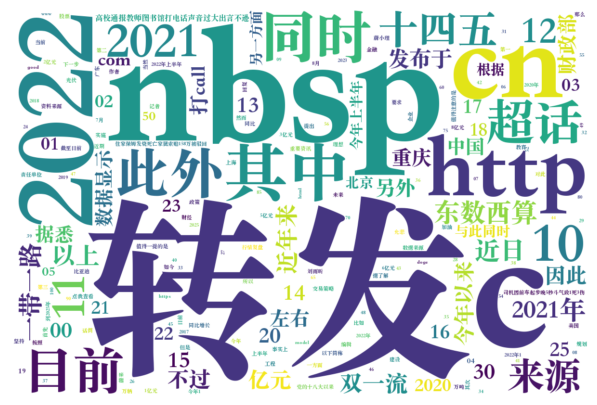

<Figure size 640x480 with 0 Axes>

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='/Users/jiaojiao/Library/Fonts/Songti.ttc'
).generate_from_frequencies(word_freq)

#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_weibo.png', dpi=100)

# 2.英文词袋模型与词云图

## 2.1数据预处理

In [1]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

In [3]:
text_ana = pd.read_csv('/Users/jiaojiao/Downloads/text_analysis_twitter.csv')
text_ana = text_ana.drop('Unnamed: 0',axis=1) #0这里要空一格

In [4]:
print(text_ana.columns)

Index(['id', 'screen_name', 'time', 'link', 'text', 'source'], dtype='object')


In [6]:
text_ana

id      screen_name                       time  \
0       881004944714866688     KamalaHarris  2017-07-01T00:22:01-04:00   
1       881002538341986304       MarcVeasey  2017-07-01T00:12:28-04:00   
2       881001393284419584     RepPaulTonko  2017-07-01T00:07:55-04:00   
3       881000301007958016        clairecmc  2017-07-01T00:03:34-04:00   
4       881015727540637696          tedcruz  2017-07-01T01:04:52-04:00   
...                    ...              ...                        ...   
299995  939743413909549056       RepTedLieu  2017-12-10T01:27:44-05:00   
299996  939743003203301376       RepTedLieu  2017-12-10T01:26:06-05:00   
299997  939741567706730497  JuliaBrownley26  2017-12-10T01:20:23-05:00   
299998  939739240501596160    SteveKnight25  2017-12-10T01:11:09-05:00   
299999  939737005180801024       RepJudyChu  2017-12-10T01:02:16-05:00   

                                                     link  \
0       https://www.twitter.com/KamalaHarris/statuses/...   
1       https://www.twitter.com/kylegriffin1/statuses/...   
2       https://www.twitter.com/RepPaulTonko/statuses/...   
3       https://www.twitter.com/clairecmc/statuses/881...   
4       https://www.twitter.com/larry_kudlow/statuses/...   
...                                                   ...   
299995  https://www.twitter.com/ReadyLA/statuses/93956...   
299996  https://www.twitter.com/LAFDtalk/statuses/9397...   
299997  https://www.twitter.com/SCE/statuses/939739240...   
299998  https://www.twitter.com/santaclarita/statuses/...   
299999  https://www.twitter.com/RepJudyChu/statuses/93...   

                                                     text               source  
0       Republicans are trying to steal health care fr...        Sprout Social  
1       RT @kylegriffin1 Rep. Mark Veasay has introduc...  Twitter for Android  
2       A top U.S. science office went dark tonight. N...   Twitter for iPhone  
3       So the fundraising quarter ends in an hour in ...     Twitter for iPad  
4       RT @larry_kudlow Important story @SenTedCruz @...   Twitter for iPhone  
...                                                   ...                  ...  
299995  RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...   Twitter for iPhone  
299996  RT @LAFDtalk Once a wildfire has burned throug...   Twitter for iPhone  
299997  RT @SCE Update: As of 8:30pm, Saturday, about ...   Twitter Web Client  
299998  RT @santaclarita #RyeFire Evening Update (12/9...   Twitter for iPhone  
299999  So thankful for our hardworking firefighters. ...   Twitter for iPhone  

[300000 rows x 6 columns]

In [7]:
text = list(text_ana['text'])
text

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter',
 'Threats already higher than all of 2016!  Resist! http://thehill.com/homen

In [8]:
text = list(text_ana['text'])[:100]
text

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter',
 'Threats already higher than all of 2016!  Resist! http://thehill.com/homen

In [9]:
text = "".join(text)
text

'Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump\'s Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpgA top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpgSo the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donateRT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitterThreats already higher than all of 2016!  Resist! http://thehill.com/homenews/house/340309-threats-

In [10]:
import re

#分析语料
text = list(text_ana['text'])[:100]

# Lowercase each text in the list
text = [t.lower() for t in text]

# Combine the list of texts into a single string
text = ' '.join(text)

# Remove URLs
text = re.sub(r'http\S+', '', text)

# Split the string into a list of words
text = text.split(" ")

# Now you can proceed with further processing
# For example, lemmatization
#lemmatizer = WordNetLemmatizer()
#tokens = [lemmatizer.lemmatize(token) for token in text]

# Join tokens back to form a bag of words
text_bow = " ".join(text)
text_bow

'republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%. rt @kylegriffin1 rep. mark veasay has introduced a bill to ensure no taxpayer funds will be used to support trump\'s election commission.  a top u.s. science office went dark tonight. not good. #sciencematters  qt @elleabella1112 science division out. mic drop.  so the fundraising quarter ends in an hour in mo. i would really appreciate a $5 contribution. thank you so much.  rt @larry_kudlow important story @sentedcruz @nro.  threats already higher than all of 2016!  resist!  happy birthday @senjoniernst! read @reploucorrea article on one of california\'s finest officers "achieving the american dream"  #heretostay rt @airandspace 41 years ago today, the official ribbon cutting at our museum in dc was triggered by a spacecraft orbiting mars!  great job daylen! #littleleague #baseball #esva  qt @13newsnow eastern shore little league player invited to national mlb event   john 14:6 je

## 2.2构建词袋模型

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x=vectorizer.fit_transform(text_ana[:100])

x

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
import re
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(text_ana["text"][:10].apply(preprocess_text))

print("词袋特征矩阵的形状:", X.shape)
print("特征词列表:", vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (10, 139)
特征词列表: ['04' '13newsnow' '2016' '22' '41' 'achieving' 'ago' 'airandspace' 'all'
 'already' 'american' 'an' 'appreciate' 'are' 'article' 'at' 'baseball'
 'be' 'bill' 'birthday' 'by' 'californias' 'care' 'commission'
 'contribution' 'cutting' 'dark' 'daylen' 'dc' 'division' 'dream' 'drop'
 'eastern' 'election' 'elleabella1112' 'ends' 'ensure' 'esva' 'event'
 'finest' 'from' 'fundraising' 'funds' 'good' 'great' 'happy' 'has'
 'health' 'help' 'heretostay' 'higher' 'hour' 'httpbitly2tvcp5k'
 'httpclairemccaskillcomdonate' 'httppbstwimgcommediaddl7nt9xoaeejxbjpg'
 'httppbstwimgcommediaddm3pgaxcaafbiojpg'
 'httppbstwimgcommediaddpvb1xxoaa3zhzjpg'
 'httppbstwimgcommediaddpycekwaaiwrcajpg'
 'httpsmediumcomcongressmanloucorreaachievingtheamericandream1fb26950da7d'
 'httpstwittercom13newsnowstatus881113918986489857'
 'httpstwittercomelleabella1112status880870684485984256'
 'httpthehillcomhomenewshouse340309threatsagainstlawmakersspikedthisyear'
 'httpwwwnationalreviewcomartic

In [16]:
dense_X = X.toarray()  
list_X = dense_X.tolist()  

print(list_X)  

[[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## 2.3词频统计

In [19]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [20]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('to', 5),
 ('in', 4),
 ('the', 4),
 ('rt', 3),
 ('of', 2),
 ('qt', 2),
 ('science', 2),
 ('so', 2),
 ('04', 1),
 ('13newsnow', 1),
 ('2016', 1),
 ('22', 1),
 ('41', 1),
 ('achieving', 1),
 ('ago', 1),
 ('airandspace', 1),
 ('all', 1),
 ('already', 1),
 ('american', 1),
 ('an', 1),
 ('appreciate', 1),
 ('are', 1),
 ('article', 1),
 ('at', 1),
 ('baseball', 1),
 ('be', 1),
 ('bill', 1),
 ('birthday', 1),
 ('by', 1),
 ('californias', 1),
 ('care', 1),
 ('commission', 1),
 ('contribution', 1),
 ('cutting', 1),
 ('dark', 1),
 ('daylen', 1),
 ('dc', 1),
 ('division', 1),
 ('dream', 1),
 ('drop', 1),
 ('eastern', 1),
 ('election', 1),
 ('elleabella1112', 1),
 ('ends', 1),
 ('ensure', 1),
 ('esva', 1),
 ('event', 1),
 ('finest', 1),
 ('from', 1),
 ('fundraising', 1),
 ('funds', 1),
 ('good', 1),
 ('great', 1),
 ('happy', 1),
 ('has', 1),
 ('health', 1),
 ('help', 1),
 ('heretostay', 1),
 ('higher', 1),
 ('hour', 1),
 ('httpbitly2tvcp5k', 1),
 ('httpclairemccaskillcomdonate', 1),
 ('httppbstw

## 2.4英文词云图

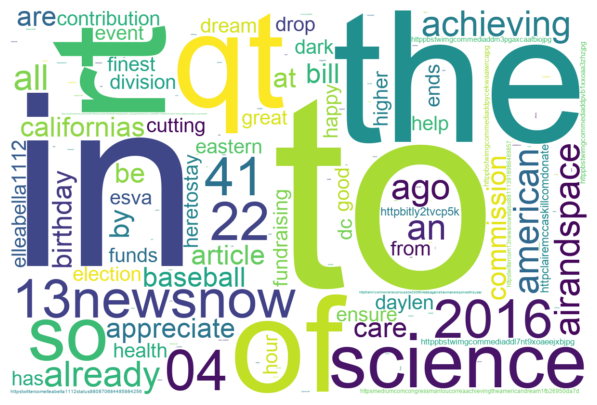

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='/System/Library/Fonts/Arial.ttf'  # Adjust this path as per your system
).generate_from_frequencies(word_freq)

#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3.个人作业词袋模型与词云图

## 3.1数据预处理

In [23]:
import requests #获取网页内容
from bs4 import BeautifulSoup #解析和提取网页内容

In [24]:
url="http://www.hprc.org.cn/wxzl/wxysl/lczf/" #定义了一个名为url的变量，存储了一个网址，网址指向的是页面。
content=requests.get(url) #查看content对象的编码方式
content.encoding #HTTP响应内容的编码方式

'ISO-8859-1'

In [25]:
content.encoding = 'utf8' # 'gb18030' #正确解码网页内容
content = content.text #将从content对象中提取纯文本内容。content.text返回的是一个字符串形式的网页HTML内容。

In [26]:
#从指定URL的页面中抓取特定的链接，并展示第一个抓取到的链接。
soup=BeautifulSoup(content,'html.parser') #使用BeautifulSoup解析器来解析前面获取的网页内容content。'html.parser'是用来解析HTML的解析器。soup对象现在代表了整个HTML文档的结构，可以用来访问和操作网页的各个部分。
links=soup.select('.bl a') #使用BeautifulSoup的select方法，从解析的HTML中选择所有具有.bl类的元素内的<a>标签（即超链接）。这通常用于定位页面中的特定信息，.bl a是一个CSS选择器，表示选择所有类名为bl的元素下的a标签。
print(links[0])  #打印出links列表的第一个元素。由于links是一个包含所有匹配.bl a选择器的<a>标签的列表，这行代码打印出列表中的第一个链接标签。

<a href="./shisijbg/202303/t20230315_5607611.html" target="_blank" title="2023年政府工作报告">2023年政府工作报告</a>


In [27]:
len(links)

54

In [29]:
hyperlinks = [url + i['href'].split('./')[1] for i in links]
hyperlinks[:5]

['http://www.hprc.org.cn/wxzl/wxysl/lczf/shisijbg/202303/t20230315_5607611.html',
 'http://www.hprc.org.cn/wxzl/wxysl/lczf/dssjqgrmdbdh_1/202203/t20220313_5398415.html',
 'http://www.hprc.org.cn/wxzl/wxysl/lczf/dssjqgrmdbdh_1/202103/t20210316_5318622.html',
 'http://www.hprc.org.cn/wxzl/wxysl/lczf/dssjqgrmdbdh_1/202006/t20200604_5138985.html',
 'http://www.hprc.org.cn/wxzl/wxysl/lczf/dssjqgrmdbdh_1/201903/t20190318_4849567.html']

In [30]:
print(hyperlinks[15]) # 2007年有分页

http://www.hprc.org.cn/wxzl/wxysl/lczf/dishiyijie/200908/t20090817_3955447.html


In [31]:
url_i = 'http://www.hprc.org.cn/wxzl/wxysl/lczf/dishiyijie_1/200908/t20090818_3955570.html'
content = requests.get(url_i)
content.encoding = 'utf8'
content = content.text
soup = BeautifulSoup(content, 'html.parser') 
scripts = soup.select('td script')[0]

In [32]:
scripts

<script>
	var currentPage = 0;//所在页从0开始
	var prevPage = currentPage-1//上一页
	var 下一页Page = currentPage+1//下一页
	var countPage = 4//共多少页
	//document.write("共"+countPage+"页&nbsp;&nbsp;");
	
	//循环
	var num = 17;
	for(var i=0+(currentPage-1-(currentPage-1)%num) ; i<=(num+(currentPage-1-(currentPage-1)%num))&&(i<countPage) ; i++){
		if(countPage >1){
			if(currentPage==i)
				document.write("【<span style=\"color:#FF0000;\" class=\"hui14_30_h\">"+(i+1)+"</span>】&nbsp;");
			else if(i==0)
				document.write("<a href=\"t20090818_3955570.html\" class=\"hui14_30_h\">【"+(i+1)+"】</a>&nbsp;");
			else
				document.write("<a href=\"t20090818_3955570"+"_" + i + "."+"html\" class=\"hui14_30_h\">【"+(i+1)+"】</a>&nbsp;");
		}	
	}
	
	document.write("<br><br>");
	//设置上一页代码
	if(countPage>1&&currentPage!=0&&currentPage!=1)
		document.write("<a href=\"t20090818_3955570"+"_" + prevPage + "."+"html\"><span style=\"color:#0033FF;font-weight:bold\">上一页</span></a>&nbsp;");
	else if(countPage>1&&currentPage!=0&&curre

In [33]:
scripts.text

'\n\tvar currentPage = 0;//所在页从0开始\n\tvar prevPage = currentPage-1//上一页\n\tvar 下一页Page = currentPage+1//下一页\n\tvar countPage = 4//共多少页\n\t//document.write("共"+countPage+"页&nbsp;&nbsp;");\n\t\n\t//循环\n\tvar num = 17;\n\tfor(var i=0+(currentPage-1-(currentPage-1)%num) ; i<=(num+(currentPage-1-(currentPage-1)%num))&&(i<countPage) ; i++){\n\t\tif(countPage >1){\n\t\t\tif(currentPage==i)\n\t\t\t\tdocument.write("【<span style=\\"color:#FF0000;\\" class=\\"hui14_30_h\\">"+(i+1)+"</span>】&nbsp;");\n\t\t\telse if(i==0)\n\t\t\t\tdocument.write("<a href=\\"t20090818_3955570.html\\" class=\\"hui14_30_h\\">【"+(i+1)+"】</a>&nbsp;");\n\t\t\telse\n\t\t\t\tdocument.write("<a href=\\"t20090818_3955570"+"_" + i + "."+"html\\" class=\\"hui14_30_h\\">【"+(i+1)+"】</a>&nbsp;");\n\t\t}\t\n\t}\n\t\n\tdocument.write("<br><br>");\n\t//设置上一页代码\n\tif(countPage>1&&currentPage!=0&&currentPage!=1)\n\t\tdocument.write("<a href=\\"t20090818_3955570"+"_" + prevPage + "."+"html\\"><span style=\\"color:#0033FF;font-weight:b

In [34]:
countPage = int(scripts.text.split('countPage = ')[1].split('//')[0])
countPage

4

In [35]:
import sys 
#定义名为 crawler 的函数，从网页中抓取文本数据，并返回该网页所涵盖的年份和全部文本内容
    
def crawler(url_i):
    content = requests.get(url_i)
    content.encoding = 'utf8'  
    content = content.text
    soup = BeautifulSoup(content, 'html.parser') 
    year = soup.find('span', {'class', 'huang16c'}).text[:4]
    year = int(year)
    report = ''.join(s.text for s in soup('p')) #找到分页信息
    scripts = soup.find_all('script')
    countPage = int(''.join(scripts[1]).split('countPage = ')[1].split('//')[0])
    if countPage == 1:
        pass
    else:
        for i in range(1, countPage):
            url_child = url_i.split('.html')[0] +'_'+str(i)+'.html'
            content = requests.get(url_child)
            content.encoding = 'utf8'
            content = content.text
            soup = BeautifulSoup(content, 'html.parser') 
            report_child = ''.join(s.text for s in soup('p'))
            report = report + report_child
    return year, report

In [36]:
hyperlinks[16]

'http://www.hprc.org.cn/wxzl/wxysl/lczf/dishiyijie_1/200908/t20090818_3955570.html'

In [37]:
reports = {}
for link in hyperlinks:
    year, report = crawler(link)
    print(year, end= '\r') #flush and print
    reports[year] = report 

In [43]:
import pandas as pd

# 使用绝对路径，并确保使用正确的路径分隔符
file_path = '/Users/jiaojiao/Downloads/政府工作报告.csv'

with open(file_path, 'w', encoding='UTF-8') as f:
    for r in reports:
        line = str(r) + '\t' + reports[r].replace('\n', ' ').replace('\t', ' ') + '\n'
        f.write(line)

df.to_csv(file_path, index=False, sep=',', encoding='utf-8')

# 确认数据是否正确写入
df = pd.read_table(file_path, sep='\t', names=['year', 'report'])
print(df[:68])

                                                 year  report
0                                         year,report     NaN
1   2023,　　新华社北京3月14日电政府工作报告 ——2023年3月5日在第十四届全国人民代...     NaN
2   2022,各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提...     NaN
3   2021,各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提...     NaN
4   2020,　　新华社北京5月29日电　　政府工作报告　　——2020年5月22日在第十三届全...     NaN
5   2019,　　新华社北京3月16日电　　 政府工作报告　　——2019年3月5日在第十三届全...     NaN
6   2018,　　各位代表：　　现在，我代表国务院，向大会报告过去五年政府工作，对今年工作提出建...     NaN
7   2017,　　各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各...     NaN
8   2016,政府工作报告 ——2016年3月5日在第十二届全国人民代表大会第四次会议上 　  ...     NaN
9   2015,　　国务院总理 李克强　　各位代表：　　现在，我代表国务院，向大会报告政府工作，请...     NaN
10  2014,　　3月5日，李克强代表国务院在十二届全国人大二次会议上作《政府工作报告》。 新华...     NaN
11  2013,　　各位代表：　　现在，我代表国务院，向大会报告过去五年的政府工作，并对今年工作提...     NaN
12  2012,　　3月5日，国务院总理温家宝在第十一届全国人民代表大会第五次会议上作政府工作报告...     NaN
13  2011,政府工作报告 ——2011年3月5日在第十一届全国人民代表大会第四次会议上国务院总...     NaN
14  2010,政府工作报告 ——２０１０年３月５日在第十一届全国人民代表大会第三次会议上 国务院...     NaN
15  2009

In [45]:
import pandas as pd
text_ana = pd.read_csv('/Users/jiaojiao/Downloads/政府工作报告.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

report
year                                                   
2023  　　新华社北京3月14日电政府工作报告 ——2023年3月5日在第十四届全国人民代表大会第一...
2022  各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。　...
2021  各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协委员提出意见。　...
2020  　　新华社北京5月29日电　　政府工作报告　　——2020年5月22日在第十三届全国人民代表...
2019  　　新华社北京3月16日电　　 政府工作报告　　——2019年3月5日在第十三届全国人民代表...
2018  　　各位代表：　　现在，我代表国务院，向大会报告过去五年政府工作，对今年工作提出建议，请予审...
2017  　　各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出...
2016  政府工作报告 ——2016年3月5日在第十二届全国人民代表大会第四次会议上 　  国务院总理...
2015  　　国务院总理 李克强　　各位代表：　　现在，我代表国务院，向大会报告政府工作，请予审议，并...
2014  　　3月5日，李克强代表国务院在十二届全国人大二次会议上作《政府工作报告》。 新华社记者姚大...
2013  　　各位代表：　　现在，我代表国务院，向大会报告过去五年的政府工作，并对今年工作提出建议，请...
2012  　　3月5日，国务院总理温家宝在第十一届全国人民代表大会第五次会议上作政府工作报告。记者 李...
2011  政府工作报告 ——2011年3月5日在第十一届全国人民代表大会第四次会议上国务院总理  温家...
2010  政府工作报告 ——２０１０年３月５日在第十一届全国人民代表大会第三次会议上 国务院总理 温家...
2009  　　各位代表：　　现在，我代表国务院，向大会作政府工作报告，请予审议，并请全国政协各位委员提...
2008  各位代表：　　现在，我代表国务院，向大会报告本届政府过去五年的工作，对今年工作提出建议，请予...
2007  政府工作报告　  ——2007年3月5日在第十届全国人民代表大会第五次会议上国务院总理　温家...
2006  2006年政 府 工 作 报 告  ——2006年3月5日在第十届全国人民代表大会第四次会议...
2005  2005年政府工作报告  ——2005年3月5日在第十届全国人民代表大会第三次会议上　　　　...
2004  2004年政府工作报告——2004年3月5日在第十届全国人民代表大会第二次会议上      ...
2003  2003年政府工作报告  ——2003年3月5日在第十届全国人民代表大会第一次会议上    ...
2002  2002年政府工作报告　　——2002年3月5日在第九届全国人民代表大会第五次会议上  　　...
2001  2001年政府工作报告——2001年3月5日在第九届全国人民代表大会第四次会议上  　　　　...
2000  2000年政府工作报告——2000年3月5日在第九届全国人民代表大会第三次会议上　　　　　　...
1999  1999年政府工作报告——1999年3月5日在第九届全国人民代表大会第二次会议上　　　　　　...
1998  1998年政府工作报告　　——1 9 9 8 年3 月5 日在第九届全国人民代表大会第一次会...
1997  1997年政府工作报告  ——１９９７年３月１日在第八届全国人民代表大会第五次会议上　　　　...
1996   1996年政府工作报告关于国民经济和社会发展“九五”计划和２０１０年远景目标纲要的报告——...
1995  1995年政府工作报告——1995年3月5日在第八届全国人民代表大会第三次会议上　　　　　　...
1994   1994年政府工作报告——1994年3月10日在第八届全国人民代表大会第二次会议上　　　　...
1993  1993年政府工作报告——１９９３年３月１５日在第八届全国人民代表大会第一次会议上　　　　　...
1992  1992年政府工作报告　　——１９９２年３月２０日在第七届全国人民代表大会第五次会议上　　　...
1991   1991年政府工作报告关于１９９０年国民经济和社会发展计划执行情况与１９９１年计划草案的报...
1990   1990年政府工作报告为我国政治经济和社会的进一步稳定发展而奋斗　　——１９９０年３月２０...
1989  1989年政府工作报告坚决贯彻治理整顿和深化改革的方针——１９８９年３月２０日在第七届全国人...
1988   1988年政府工作报告  ——１９８８年３月２５日在第七届全国人民代表大会第一次会议上　　...
1987  1987年政府工作报告——１９８７年３月２５日在第六届全国人民代表大会第五次会议上　　　　　...
1986   1986年政府工作报告关于第七个五年计划的报告——1986年3月25日在第六届全国人民代表...
1985  1985年政府工作报告当前的经济形势和经济体制改革——1985年3月27日在第六届全国人民代...
1984  1984年政府工作报告－－1984年5月15日在第六届全国人民代表大会第二次会议上　　　　　...
1983  1983年政府工作报告——1983年6月6日在第六届全国人民代表大会第一次会议上　　　　　　...
1982  1982年国务院政府工作报告 关于第六个五年计划的报告——1982年11月30日在第五届全国...
1981  1981年政府工作报告　　当前的经济形势和今后经济建设的方针——1981年11月30日和12...
1980   1980年政府工作报告关于１９８０、１９８１年国民经济计划安排的报告——１９８０年８月３０...
1979  1979年政府工作报告——1979年6月18日在第五届全国人民代表大会第二次会议上　　　　　...
1978  1978年政府工作报告团结起来，为建设社会主义的现代化强国而奋斗　　——1978年2月26日...
1975   1975年国务院政府工作报告——1975年1月13日在第四届全国人民代表大会第一次会议上　...
1964  1964年国务院政府工作报告（摘要）——１９６４年１２月２１日和２２日在第三届全国人民代表大...
1959       1959年国务院政府工作报告 ——1959年4月18日在第二届全国人民代表大会第一...
1960  　1960年政府工作报告　  为提前实现全国农业发展纲要而奋斗——1960年4月6日在第二届...
1957  1957年国务院政府工作报告——1957年6月26日在第一届全国人民代表大会第四次会议上　　...
1956  1956年国务院政府工作报告关于1955年国家决算和1956年国家预算的报告——１９５６年６...
1955  1955年国务院政府工作报告关于发展国民经济的第一个五年计划的报告 ——1955年7月5日至...
1954  1954年政府工作报告——1954年5月23日在中华人民共和国第一届全国人民代表大会第一次会...

In [46]:
# 分析语料
text = list(text_ana['report'])
text

['\u3000\u3000新华社北京3月14日电政府工作报告\xa0——2023年3月5日在第十四届全国人民代表大会第一次会议上\xa0国务院总理\u3000李克强\xa0\xa0\u3000\u30003月5日，李克强代表国务院在十四届全国人大一次会议上作《政府工作报告》。新华社记者 饶爱民 摄\xa0各位代表：\u3000\u3000本届政府任期即将结束。现在，我代表国务院，向大会报告工作，请予审议，并请全国政协委员提出意见。\u3000\u3000一、过去一年和五年工作回顾\xa0\u3000\u30002022年是党和国家历史上极为重要的一年。党的二十大胜利召开，描绘了全面建设社会主义现代化国家的宏伟蓝图。面对风高浪急的国际环境和艰巨繁重的国内改革发展稳定任务，以习近平同志为核心的党中央团结带领全国各族人民迎难而上，全面落实疫情要防住、经济要稳住、发展要安全的要求，加大宏观调控力度，实现了经济平稳运行、发展质量稳步提升、社会大局保持稳定，我国发展取得来之极为不易的新成就。\u3000\u3000过去一年，我国经济发展遇到疫情等国内外多重超预期因素冲击。在党中央坚强领导下，我们高效统筹疫情防控和经济社会发展，根据病毒变化和防疫形势，优化调整疫情防控措施。面对经济新的下行压力，果断应对、及时调控，动用近年储备的政策工具，靠前实施既定政策举措，坚定不移推进供给侧结构性改革，出台实施稳经济一揽子政策和接续措施，部署稳住经济大盘工作，加强对地方落实政策的督导服务，支持各地挖掘政策潜力，支持经济大省勇挑大梁，突出稳增长稳就业稳物价，推动经济企稳回升。全年国内生产总值增长3%，城镇新增就业1206万人，年末城镇调查失业率降到5.5%，居民消费价格上涨2%。货物进出口总额增长7.7%。财政赤字率控制在2.8%，中央财政收支符合预算、支出略有结余。国际收支保持平衡，人民币汇率在全球主要货币中表现相对稳健。粮食产量1.37万亿斤，增产74亿斤。生态环境质量持续改善。在攻坚克难中稳住了经济大盘，在复杂多变的环境中基本完成全年发展主要目标任务，我国经济展现出坚强韧性。\u3000\u3000针对企业生产经营困难加剧，加大纾困支持力度。受疫情等因素冲击，不少企业和个体工商户遇到特殊困难。全年增值税留抵退税超过2.4万亿元，新增减税降费超过1万亿元，缓税缓费7500多亿元。为有力支持

## 3.2jieba分词

In [47]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['report'] = text_ana['report'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['report'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/4l/_lcd9phj5pz4r5t7ryzwbtzh0000gn/T/jieba.cache
Loading model cost 0.243 seconds.
Prefix dict has been built successfully.


year
2023    　 　 新华社 北京 3 月 14 日电 政府 工作 报告   — — 2023 年 3 月...
2022    各位 代表 ： 　 　 现在 ， 我 代表 国务院 ， 向 大会 报告 政府 工作 ， 请予...
2021    各位 代表 ： 　 　 现在 ， 我 代表 国务院 ， 向 大会 报告 政府 工作 ， 请予...
2020    　 　 新华社 北京 5 月 29 日电 　 　 政府 工作 报告 　 　 — — 2020...
2019    　 　 新华社 北京 3 月 16 日电 　 　   政府 工作 报告 　 　 — — 20...
Name: report, dtype: object

In [48]:
text = list(text_ana['report'].dropna())
text

['\u3000 \u3000 新华社 北京 3 月 14 日电 政府 工作 报告 \xa0 — — 2023 年 3 月 5 日 在 第十四届 全国人民代表大会 第一次 会议 上 \xa0 国务院 总理 \u3000 李克强 \xa0 \xa0 \u3000 \u3000 3 月 5 日 ， 李克强 代表 国务院 在 十四届 全国人大 一次 会议 上作 《 政府 工作 报告 》 。 新华社 记者   饶 爱民   摄 \xa0 各位 代表 ： \u3000 \u3000 本届 政府 任期 即将 结束 。 现在 ， 我 代表 国务院 ， 向 大会 报告 工作 ， 请予 审议 ， 并 请 全国政协 委员 提出 意见 。 \u3000 \u3000 一 、 过去 一年 和 五年 工作 回顾 \xa0 \u3000 \u3000 2022 年 是 党和国家 历史 上 极为重要 的 一年 。 党 的 二十大 胜利 召开 ， 描绘 了 全面 建设 社会主义 现代化 国家 的 宏伟蓝图 。 面对 风高浪 急 的 国际 环境 和 艰巨 繁重 的 国内 改革 发展 稳定 任务 ， 以 习近平 同志 为 核心 的 党中央 团结 带领 全国 各族人民 迎难而上 ， 全面落实 疫情 要 防住 、 经济 要 稳住 、 发展 要 安全 的 要求 ， 加大 宏观调控 力度 ， 实现 了 经济 平稳 运行 、 发展 质量 稳步 提升 、 社会 大局 保持稳定 ， 我国 发展 取得 来 之 极为 不易 的 新 成就 。 \u3000 \u3000 过去 一年 ， 我国 经济 发展 遇到 疫情 等 国内外 多重 超 预期 因素 冲击 。 在 党中央 坚强 领导 下 ， 我们 高效 统筹 疫情 防控 和 经济社会 发展 ， 根据 病毒 变化 和 防疫 形势 ， 优化 调整 疫情 防控 措施 。 面对 经济 新 的 下行 压力 ， 果断 应对 、 及时 调控 ， 动用 近年 储备 的 政策 工具 ， 靠前 实施 既定政策 举措 ， 坚定不移 推进 供给 侧 结构性 改革 ， 出台 实施 稳 经济 一揽子 政策 和 接续 措施 ， 部署 稳住 经济 大盘 工作 ， 加强 对 地方 落实政策 的 督导 服务 ， 支持 各地 挖掘 政策 潜力 ， 支持 经济 大省勇 挑大梁 ， 突出 稳 增长 稳 就业 稳 

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (54, 20493)


In [50]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['01' '02' '03' ... '龙头' '龙头企业' '龙羊峡']


## 3.3词频统计

In [51]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [52]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

20493

In [53]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('发展', 5916),
 ('建设', 3824),
 ('经济', 3383),
 ('我们', 3124),
 ('加强', 2466),
 ('改革', 2442),
 ('工作', 2371),
 ('国家', 2295),
 ('企业', 2274),
 ('人民', 2203),
 ('我国', 2150),
 ('社会主义', 1930),
 ('社会', 1748),
 ('提高', 1715),
 ('增长', 1657),
 ('继续', 1653),
 ('生产', 1561),
 ('增加', 1522),
 ('推进', 1476),
 ('政府', 1443),
 ('农业', 1389),
 ('必须', 1354),
 ('问题', 1281),
 ('坚持', 1203),
 ('积极', 1201),
 ('促进', 1199),
 ('方面', 1145),
 ('制度', 1137),
 ('加快', 1114),
 ('农村', 1077),
 ('进一步', 1072),
 ('政策', 1026),
 ('进行', 1026),
 ('全国', 1025),
 ('中国', 1023),
 ('教育', 1008),
 ('支持', 993),
 ('工业', 990),
 ('投资', 982),
 ('实现', 976),
 ('完善', 950),
 ('稳定', 921),
 ('地区', 904),
 ('重要', 901),
 ('市场', 900),
 ('重点', 898),
 ('管理', 886),
 ('生活', 883),
 ('基本', 879),
 ('计划', 874),
 ('扩大', 866),
 ('文化', 858),
 ('实施', 843),
 ('全面', 814),
 ('基础', 814),
 ('努力', 805),
 ('群众', 787),
 ('改善', 784),
 ('取得', 776),
 ('今年', 759),
 ('关系', 757),
 ('实行', 754),
 ('地方', 753),
 ('解决', 736),
 ('水平', 730),
 ('事业', 724),
 ('建立', 710),
 ('技术', 703),
 ('服务', 6

## 3.4词云图

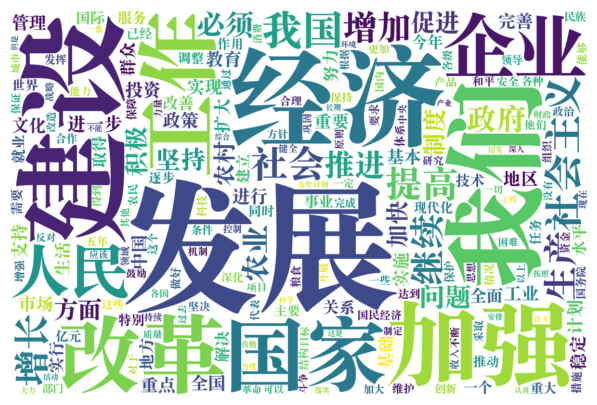

<Figure size 640x480 with 0 Axes>

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='/Users/jiaojiao/Library/Fonts/Songti.ttc'
).generate_from_frequencies(word_freq)

#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_weibo.png', dpi=100)